# 目的：通过三个最活跃用户在五个不同场所类别的签入频率，预测用户签入偏好

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集

In [21]:
df = pd.read_csv("C:/Users/lx/Desktop/Low-MScThesis/BAReport - Dataset/foursquare-nyc-and-tokyo-check-ins/dataset_TSMC2014_TKY.csv")

# 统计分析

In [22]:
df1 = df

将数据集中三个用户的数据分别提取出来

In [23]:
df1_1 = df1.drop(index=(df1.loc[(df['userId']!= 1240)].index))
df1_2 = df1.drop(index=(df1.loc[(df['userId']!= 822)].index))
df1_3 = df1.drop(index=(df1.loc[(df['userId']!= 1143)].index))

In [24]:
df1_1.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
28,1240,4c21de7c9a67a593f285db87,4d954b0ea243a5684a65b473,Convenience Store,35.578777,139.734069,540,Tue Apr 03 20:55:16 +0000 2012
2057,1240,4bbc34fcafe1b713222e304b,4bf58dd8d48988d10a951735,Bank,35.562724,139.717501,540,Wed Apr 04 07:27:29 +0000 2012
2120,1240,4c21de7c9a67a593f285db87,4d954b0ea243a5684a65b473,Convenience Store,35.578777,139.734069,540,Wed Apr 04 07:43:09 +0000 2012
3745,1240,4cb2a1a81463a1432adeaea9,4bf58dd8d48988d1e1931735,Arcade,35.562344,139.713788,540,Wed Apr 04 13:20:04 +0000 2012
6220,1240,4b598c34f964a520f78b28e3,4bf58dd8d48988d1e1931735,Arcade,35.699037,139.770863,540,Sat Apr 07 12:38:31 +0000 2012


In [25]:
df1_2.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
329,822,4b4d45eff964a520d7cf26e3,4bf58dd8d48988d129951735,Train Station,35.560684,139.723730,540,Tue Apr 03 23:11:45 +0000 2012
374,822,4bb53d352ea195216e3baa2f,4bf58dd8d48988d1df941735,Bridge,35.536766,139.702878,540,Tue Apr 03 23:20:05 +0000 2012
383,822,4b56345ff964a520330528e3,4bf58dd8d48988d129951735,Train Station,35.532754,139.700743,540,Tue Apr 03 23:20:54 +0000 2012
410,822,4b274cf5f964a520bf8524e3,4bf58dd8d48988d129951735,Train Station,35.531327,139.696902,540,Tue Apr 03 23:26:49 +0000 2012
420,822,4b974a9cf964a52091fe34e3,4bf58dd8d48988d129951735,Train Station,35.531536,139.696752,540,Tue Apr 03 23:28:05 +0000 2012


In [26]:
df1_3.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
38,1143,4b564827f964a5201f0928e3,4bf58dd8d48988d129951735,Train Station,35.772100,139.519898,540,Tue Apr 03 21:18:21 +0000 2012
64,1143,4b6e3e46f964a520e2b32ce3,4bf58dd8d48988d129951735,Train Station,35.729025,139.711096,540,Tue Apr 03 21:51:29 +0000 2012
65,1143,4b7481e1f964a520bde02de3,4bf58dd8d48988d1fd931735,Subway,35.730273,139.711378,540,Tue Apr 03 21:52:17 +0000 2012
124,1143,4d5255a107b1a0905233123c,4d954b0ea243a5684a65b473,Convenience Store,35.673203,139.760468,540,Tue Apr 03 22:21:12 +0000 2012
134,1143,4c96f8a2533aa093e95ad645,4bf58dd8d48988d124941735,Office,35.673047,139.759923,540,Tue Apr 03 22:23:37 +0000 2012


将三个数据集中的场所列项提取出来

In [27]:
df2_1 = df1_1['venueCategory']
df2_2 = df1_2['venueCategory']
df2_3 = df1_3['venueCategory']

对数据集中的场所签入频率进行数量统计

In [28]:
df3_1 = df2_1.value_counts(sort=False)
df3_2 = df2_2.value_counts(sort=False)
df3_3 = df2_3.value_counts(sort=False)
print(df2_1.value_counts(sort=False))
print(df2_2.value_counts(sort=False))
print(df2_3.value_counts(sort=False))

Convenience Store              81
Bank                            1
Arcade                        116
Train Station                1286
Bookstore                      12
Clothing Store                  4
Hobby Shop                     11
Ramen /  Noodle House          14
Bar                            37
Camera Store                    2
Subway                         40
Electronics Store              38
Chinese Restaurant              3
Japanese Restaurant            13
Café                            4
Restaurant                     11
Italian Restaurant              4
Department Store                1
Parking                         1
Bridge                          8
Miscellaneous Shop              2
Indian Restaurant               3
Historic Site                   4
Bus Station                    29
Medical Center                  3
Fast Food Restaurant           16
Road                            5
Donut Shop                      5
Fair                            3
Convention Cen

计算出五个不同场所的签入频率，并放入列表中

In [29]:
def list_total(df1,df2,list_t): 
    dfn_1 = dict(df1.count())
    dfn_2 = list(dfn_1.values())
    t1 = dfn_2[0]
    df_t = dict(df2)
    i1 = df_t.get('Train Station')
    i2 = df_t.get('Convenience Store')
    i3 = df_t.get('Subway')
    i4 = df_t.get('Food & Drink Shop')
    i5 = df_t.get('Bar')
    list_t.append(i1/t1)
    list_t.append(i2/t1)
    list_t.append(i3/t1)
    list_t.append(i4/t1)
    list_t.append(i5/t1)
    return list_t

将三个用户的数据集分别传入自定义函数中

In [30]:
df4_1 = []
df4_1 = list_total(df1_1,df3_1,df4_1)
df4_1

[0.6873329770176376,
 0.0432923570283271,
 0.021378941742383754,
 0.0005344735435595938,
 0.01977552111170497]

In [31]:
df4_2 = []
df4_2 = list_total(df1_2,df3_2,df4_2)
df4_2

[0.3507188231360749,
 0.11334002006018054,
 0.003343363423604146,
 0.023737880307589436,
 0.0504847876964226]

In [32]:
df4_3 = []
df4_3 = list_total(df1_3,df3_3,df4_3)
df4_3

[0.2233115468409586,
 0.10893246187363835,
 0.21568627450980393,
 0.08333333333333333,
 0.004901960784313725]

# 作出图表

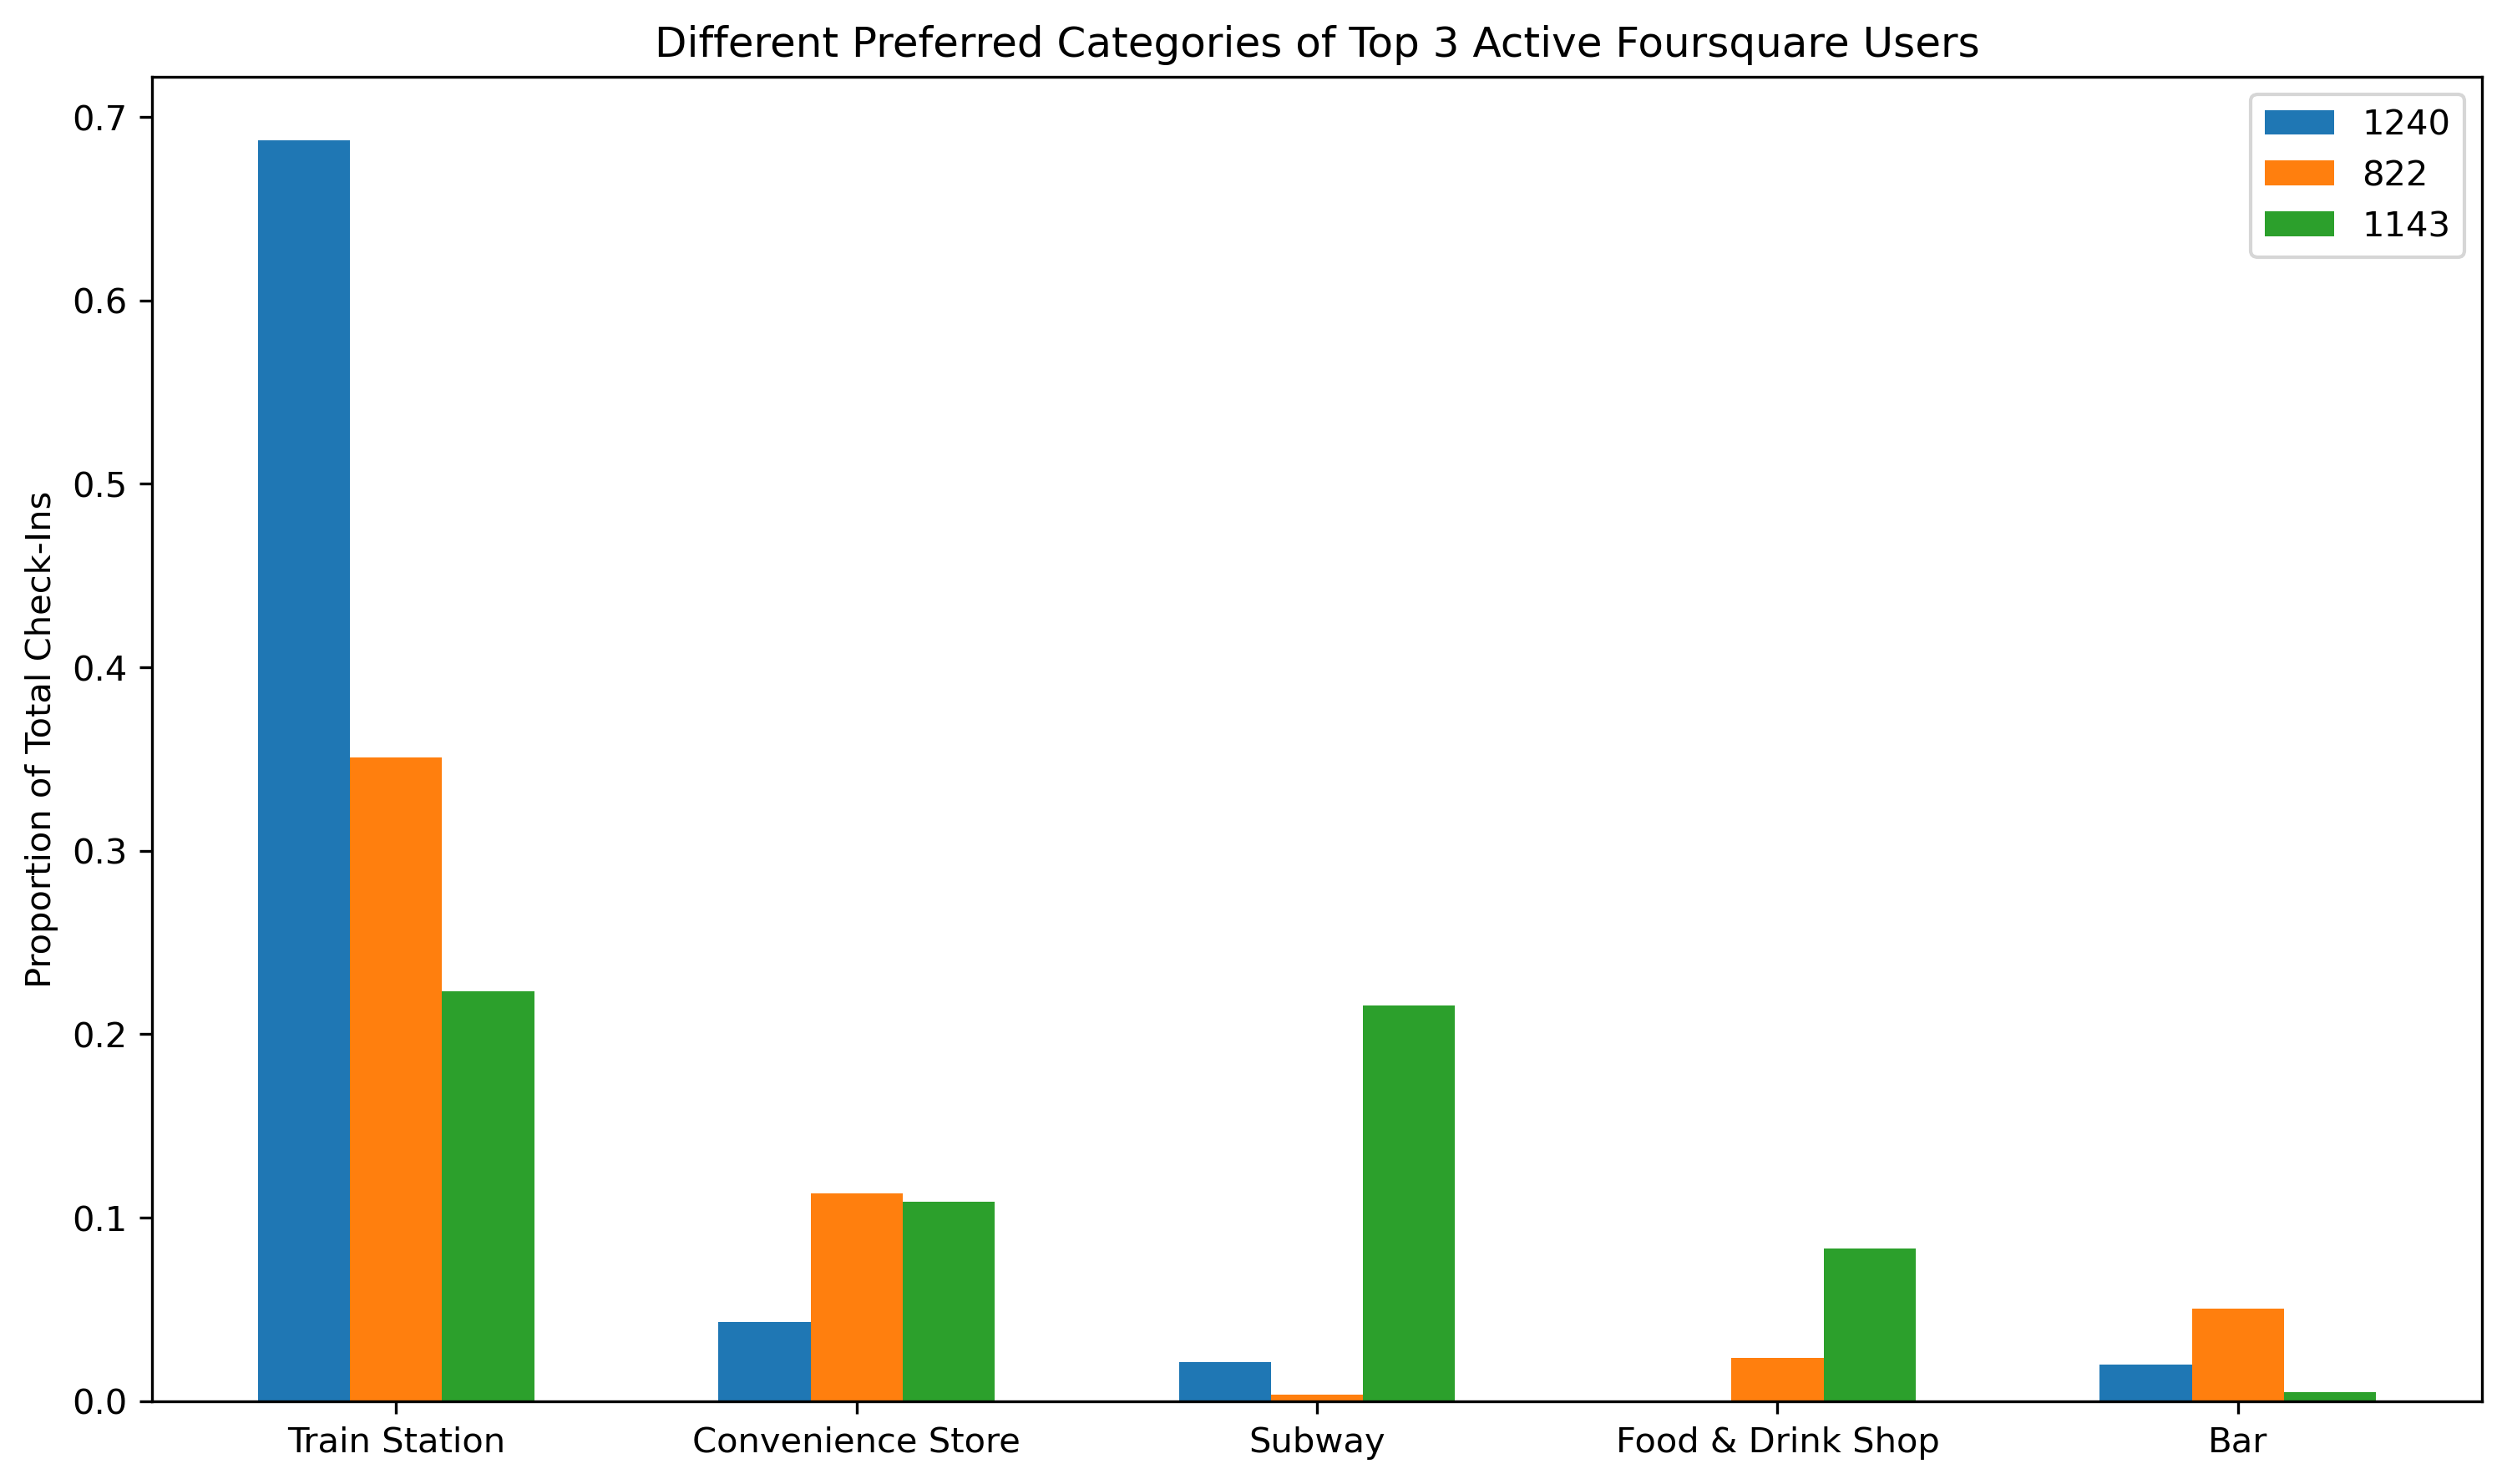

In [33]:
size = 5
x= np.arange(size)
total_width,n = 0.6, 3
width = total_width / n
x = x-(total_width - width)/2
plt.bar(x,df4_1,label='1240',width = width)
plt.bar(x+width,df4_2,label='822',width = width)
plt.bar(x+2*width,df4_3,label='1143',width = width)
plt.ylabel('Proportion of Total Check-Ins')
x1 = ['Train Station','Convenience Store','Subway','Food & Drink Shop','Bar']
x2 = range(5)
plt.xticks(x2,x1)
plt.title('Different Preferred Categories of Top 3 Active Foursquare Users')
plt.rcParams['figure.figsize']=(12.0,7.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.legend()
plt.show()

# 结果分析：图中描述了三个最活跃用户在五个不同场所类别的签入频率。用户1240是一名重型列车用户（近70%的签入在火车站），几乎不乘坐地铁。另一名用户1143经常乘坐地铁和火车，比其他两名用户更频繁地光顾餐饮店。显然，每个用户都显示出不同的签入偏好，个人用户的偏好可以高度预测下一个签入地点。